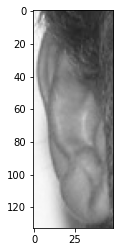

()
None
Orb aint getting shit, bad feature extraction for ears (probably due to contrast of the image


In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('data/perfectly_detected_ears/test/0205.png',0)
# Initiate ORB detector
orb = cv.ORB_create(nfeatures=5)
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()
print(kp)
print(des)
print("Orb aint getting shit, bad feature extraction for ears (probably due to contrast of the image")

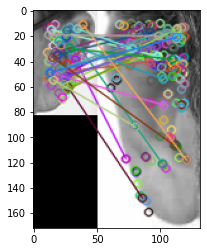

26
535.0


In [3]:

import cv2

img1 = cv2.imread('data/perfectly_detected_ears/test/0001.png',0)

img2 = cv2.imread('data/perfectly_detected_ears/test/0203.png',0)

orb = cv2.ORB_create(nfeatures=500,	fastThreshold = 10, scaleFactor = 1.2,nlevels=4,	edgeThreshold =10, patchSize=10)
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# matcher takes normType, which is set to cv2.NORM_L2 for SIFT and SURF, cv2.NORM_HAMMING for ORB, FAST and BRIEF
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
# draw first 50 matches
match_img = cv2.drawMatches(img1, kp1, img2, kp2, matches, None)
plt.imshow(match_img), plt.show()
print(len(matches))
print(sum(x.distance for x in matches))

In [4]:
from tqdm import tqdm
import numpy as np
from os import listdir
from os.path import isfile, join
import cv2
features = []

mypath="data/perfectly_detected_ears/train"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

orb = cv2.ORB_create(nfeatures=500,	fastThreshold = 10, scaleFactor = 1.2,nlevels=4,	edgeThreshold =10, patchSize=10)
# Iterate each image
for i in tqdm(onlyfiles):
    # Set the image path
    path = mypath+"/"+i
    # Read the file
    img = cv2.imread(path,0)
    # Transform the image
    kp, des = orb.detectAndCompute(img, None)
    features.append({"keypoints":kp,"description":des})

# Convert to NumPy Array
features = np.array(features)

100%|██████████| 750/750 [00:10<00:00, 74.39it/s]


In [5]:
from csv import reader
featureDict=dict(zip(onlyfiles,features))

featureWithIdsDict=dict()
i=0
with open('data/perfectly_detected_ears/annotations/recognition/ids.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    # Iterate over each row in the csv using reader object
    for row in csv_reader:
        img,id=row
        img = img.split("/")
        if(img[0]=="train"):
            f=featureDict[img[1]]
            featureWithIdsDict[img[1]]={"keypoints":f["keypoints"],"description":f["description"],"id":id}
            i+=1
featureWithIdsDict

{'0001.png': {'keypoints': (<KeyPoint 00000258A175E960>,
   <KeyPoint 00000258A175E900>,
   <KeyPoint 00000258A175E930>,
   <KeyPoint 00000258A175E8D0>,
   <KeyPoint 00000258A175E990>,
   <KeyPoint 00000258A175E750>,
   <KeyPoint 00000258A175E7B0>,
   <KeyPoint 00000258A175E810>,
   <KeyPoint 00000258A175E840>,
   <KeyPoint 00000258A175E870>,
   <KeyPoint 00000258A175EA50>,
   <KeyPoint 00000258A175EA20>,
   <KeyPoint 00000258A175EA80>,
   <KeyPoint 00000258A175EAB0>,
   <KeyPoint 00000258A175EAE0>,
   <KeyPoint 00000258A175EB10>,
   <KeyPoint 00000258A175EB40>,
   <KeyPoint 00000258A175EB70>,
   <KeyPoint 00000258A175EBA0>,
   <KeyPoint 00000258A175EBD0>,
   <KeyPoint 00000258A175EC00>,
   <KeyPoint 00000258A175EC30>,
   <KeyPoint 00000258A175EC60>,
   <KeyPoint 00000258A175EC90>,
   <KeyPoint 00000258A175ECC0>,
   <KeyPoint 00000258A175ECF0>,
   <KeyPoint 00000258A175ED20>,
   <KeyPoint 00000258A175ED50>,
   <KeyPoint 00000258A175ED80>,
   <KeyPoint 00000258A175EDB0>,
   <KeyPoint 00

In [6]:
i=0
test_path="data/perfectly_detected_ears/test/"
res=[]
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matcher = cv.DescriptorMatcher_create(cv.DescriptorMatcher_BRUTEFORCE)
with open('data/perfectly_detected_ears/annotations/recognition/ids.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    for row in csv_reader:
        img,id=row
        img = img.split("/")
        if(img[0]=="test"):
            img = cv2.imread(test_path+img[1],0)
            # Transform the image

            
            kp, des = orb.detectAndCompute(img, None)

            minDist=np.Infinity
            bestEl=None
            minDist=0
            voting={}
            intermidiateRes=dict()
            for img in featureWithIdsDict:
                #dist=np.linalg.norm(f - featureWithIdsDict[img]["features"])
                try:
                    matches = matcher.match(des, featureWithIdsDict[img]["description"])
                    #-- Filter matches using the Lowe's ratio test
                    ratio_thresh = 0.7
                    i=0
                    dist=0
                    # for m in matches:
                    #     dist=dist+m.distance
                    # if minDist>dist:
                    #     minDist=dist
                    #     bestEl=img

                    if img not in intermidiateRes:
                        intermidiateRes[img]=(dist,featureWithIdsDict[bestEl]["id"])
                    else:
                        if intermidiateRes[img][0]>dist:
                            intermidiateRes[img]=(dist,featureWithIdsDict[bestEl]["id"])


                except Exception:
                    pass
            if bestEl!=None:
                res.append((id,featureWithIdsDict[bestEl]["id"]))
            else:
                res.append((id,None))

i=0
for el in res:
    if(el[0]==el[1]):
        i+=1
print("Res {}/{}".format(i,len(res)))
print("Res {}%".format(i/len(res)))

Res 0/250
Res 0.0%
